In [69]:
import numpy as np
from sympy import symbols, Matrix, simplify
import matplotlib.pyplot as plt
from pyscf import gto, scf
from scipy.linalg import fractional_matrix_power
from scipy.optimize import brentq
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')
import plottingsystem as pts
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel

In [70]:
benzene_molecule = '''
  C    1.2116068    0.6995215    0.0000000
  C    1.2116068   -0.6995215    0.0000000
  C   -0.0000000   -1.3990430   -0.0000000
  C   -1.2116068   -0.6995215   -0.0000000
  C   -1.2116068    0.6995215   -0.0000000
  C    0.0000000    1.3990430    0.0000000
  H    2.1489398    1.2406910    0.0000000
  H    2.1489398   -1.2406910    0.0000000
  H   -0.0000000   -2.4813820   -0.0000000
  H   -2.1489398   -1.2406910   -0.0000000
  H   -2.1489398    1.2406910   -0.0000000
  H    0.0000000    2.4813820    0.0000000
'''
extra_bounds = [(0,5)]
coordinates = pts.taking_x_and_y_coordinate(pts.taking_carbon_coordinates(benzene_molecule))
print(coordinates)



[[ 1.2116068  0.6995215]
 [ 1.2116068 -0.6995215]
 [-0.        -1.399043 ]
 [-1.2116068 -0.6995215]
 [-1.2116068  0.6995215]
 [ 0.         1.399043 ]]


In [71]:
benzene = huckel(6, -0.15, -3)
benzene.create_matrix()

H = benzene.huckel_matrix
print(H)

one_electron_operator = np.zeros((6, 6))
one_electron_operator[5,5] = 1
print(one_electron_operator)

[[-0.15 -3.    0.    0.    0.   -3.  ]
 [-3.   -0.15 -3.    0.    0.    0.  ]
 [ 0.   -3.   -0.15 -3.    0.    0.  ]
 [ 0.    0.   -3.   -0.15 -3.    0.  ]
 [ 0.    0.    0.   -3.   -0.15 -3.  ]
 [-3.    0.    0.    0.   -3.   -0.15]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [72]:
elec_op = np.zeros((6, 6))
elec_op[5][5] = -1
elec_op[1][1] = 1
elec_op[3][3] = 1

print(elec_op)

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.]]


In [73]:
potentials = np.linspace(-200, 200, 101)
print(potentials)

[-200. -196. -192. -188. -184. -180. -176. -172. -168. -164. -160. -156.
 -152. -148. -144. -140. -136. -132. -128. -124. -120. -116. -112. -108.
 -104. -100.  -96.  -92.  -88.  -84.  -80.  -76.  -72.  -68.  -64.  -60.
  -56.  -52.  -48.  -44.  -40.  -36.  -32.  -28.  -24.  -20.  -16.  -12.
   -8.   -4.    0.    4.    8.   12.   16.   20.   24.   28.   32.   36.
   40.   44.   48.   52.   56.   60.   64.   68.   72.   76.   80.   84.
   88.   92.   96.  100.  104.  108.  112.  116.  120.  124.  128.  132.
  136.  140.  144.  148.  152.  156.  160.  164.  168.  172.  176.  180.
  184.  188.  192.  196.  200.]


In [74]:
electron_population = [[],[],[],[],[],[]]
energies = []
for potential in potentials:
    benzene.huckel_matrix = H + potential*one_electron_operator
    benzene.solve_huckel_matrix()
    eigenvalues = benzene.eigenvalues
    eigenvectors = benzene.eigenvectors
    print(eigenvectors)
    D_huckel = pts.making_D(eigenvectors, 6)
    for index, density in enumerate(np.diag(D_huckel)):
        electron_population[index].append(density)
    if potential.round(1) == -1.9:
        print(np.diag(D_huckel)[5])
    
    elec_to_place = 6
    i = 0
    energy = 0
    while elec_to_place >0:
        if elec_to_place > 1:
            elec_in_orbital = 2
        elif elec_to_place == 1:
            elec_in_orbital = 1
        else:
            elec_in_orbital = 0

        energy += elec_in_orbital*(eigenvalues[i]-potential*(eigenvectors.T[i] @ one_electron_operator @ eigenvectors.T[i].T))
        print(energy)
        elec_to_place -= elec_in_orbital
        i+=1
        
    energies.append(energy)




[[ 1.49929986e-02 -2.84849973e-01  4.99999953e-01  5.77205946e-01
   4.99999953e-01 -2.92350973e-01]
 [ 2.24999956e-04 -5.00703901e-01  4.99999901e-01  5.77099886e-03
  -4.99999901e-01  4.99261901e-01]
 [ 6.99999994e-06 -5.79858995e-01 -0.00000000e+00 -5.77320995e-01
   0.00000000e+00 -5.74859995e-01]
 [ 2.24999956e-04 -5.00703901e-01 -4.99999901e-01  5.77099886e-03
   4.99999901e-01  4.99261901e-01]
 [ 1.49929986e-02 -2.84849973e-01 -4.99999953e-01  5.77205946e-01
  -4.99999953e-01 -2.92350973e-01]
 [ 9.99775122e-01  8.77300107e-03 -0.00000000e+00 -1.73110021e-02
  -0.00000000e+00  8.54800105e-03]]
-0.6598418656387821
-11.290969646501669
-17.59096964650167
[[ 1.52989982e-02 -2.84769967e-01  4.99999942e-01  5.77199933e-01
   4.99999942e-01 -2.92424966e-01]
 [ 2.34000021e-04 -5.00718045e-01  5.00000045e-01  5.88900053e-03
  -5.00000045e-01  4.99246045e-01]
 [ 7.00000218e-06 -5.79910181e-01 -0.00000000e+00 -5.77320180e-01
  -0.00000000e+00 -5.74809179e-01]
 [ 2.34000021e-04 -5.00718045e-

In [75]:
def bereken_elektronenpopulatie(mu):
    # Hier voer je de berekeningen uit om de elektronenpopulatie op de gewenste site te bepalen
    # Veronderstel dat benzene, H, one_electron_operator, pts, enz. eerder zijn gedefinieerd
    benzene.huckel_matrix = H + mu * one_electron_operator
    benzene.solve_huckel_matrix()
    eigenvectors = benzene.eigenvectors
    D_huckel = pts.making_D(eigenvectors, 6)
    return np.diag(D_huckel)[5]  # Hier krijgen we bijvoorbeeld de elektronenpopulatie op de zesde site

def doel_populatie(mu, gewenste_populatie):
    # Deze functie geeft het verschil tussen de berekende populatie en de gewenste populatie terug
    berekende_populatie = bereken_elektronenpopulatie(mu)
    verschil = berekende_populatie - gewenste_populatie
    return verschil

def vind_optimale_mu(gewenste_populatie, mu_lower, mu_upper):
    # Bepaal de optimale waarde van mu binnen de opgegeven grenzen
    
    # Pas Brent's methode toe om de optimale waarde van mu te vinden
    optimale_mu = brentq(lambda mu: doel_populatie(mu, gewenste_populatie), mu_lower, mu_upper)
    
    return optimale_mu

# Voorbeeldgebruik:
gewenste_populatie = 1.25
mu_lower = -10.0  # Ondergrens voor mu
mu_upper = 10.0  # Bovengrens voor mu

optimale_mu = vind_optimale_mu(gewenste_populatie, mu_lower, mu_upper)
print("Optimale waarde van mu:", optimale_mu)


Optimale waarde van mu: -1.9461312339857322


In [76]:
populations= np.linspace(0.25, 1.75, 7)
print(populations)
mus = []
for pop in populations:
    mus.append(vind_optimale_mu(pop, mu_lower, mu_upper))
print(mus)

[0.25 0.5  0.75 1.   1.25 1.5  1.75]
[8.581979927659994, 4.356763097423601, 1.9461312339857406, 1.7763568394002505e-15, -1.9461312339857322, -4.356763097423599, -8.581979927659962]


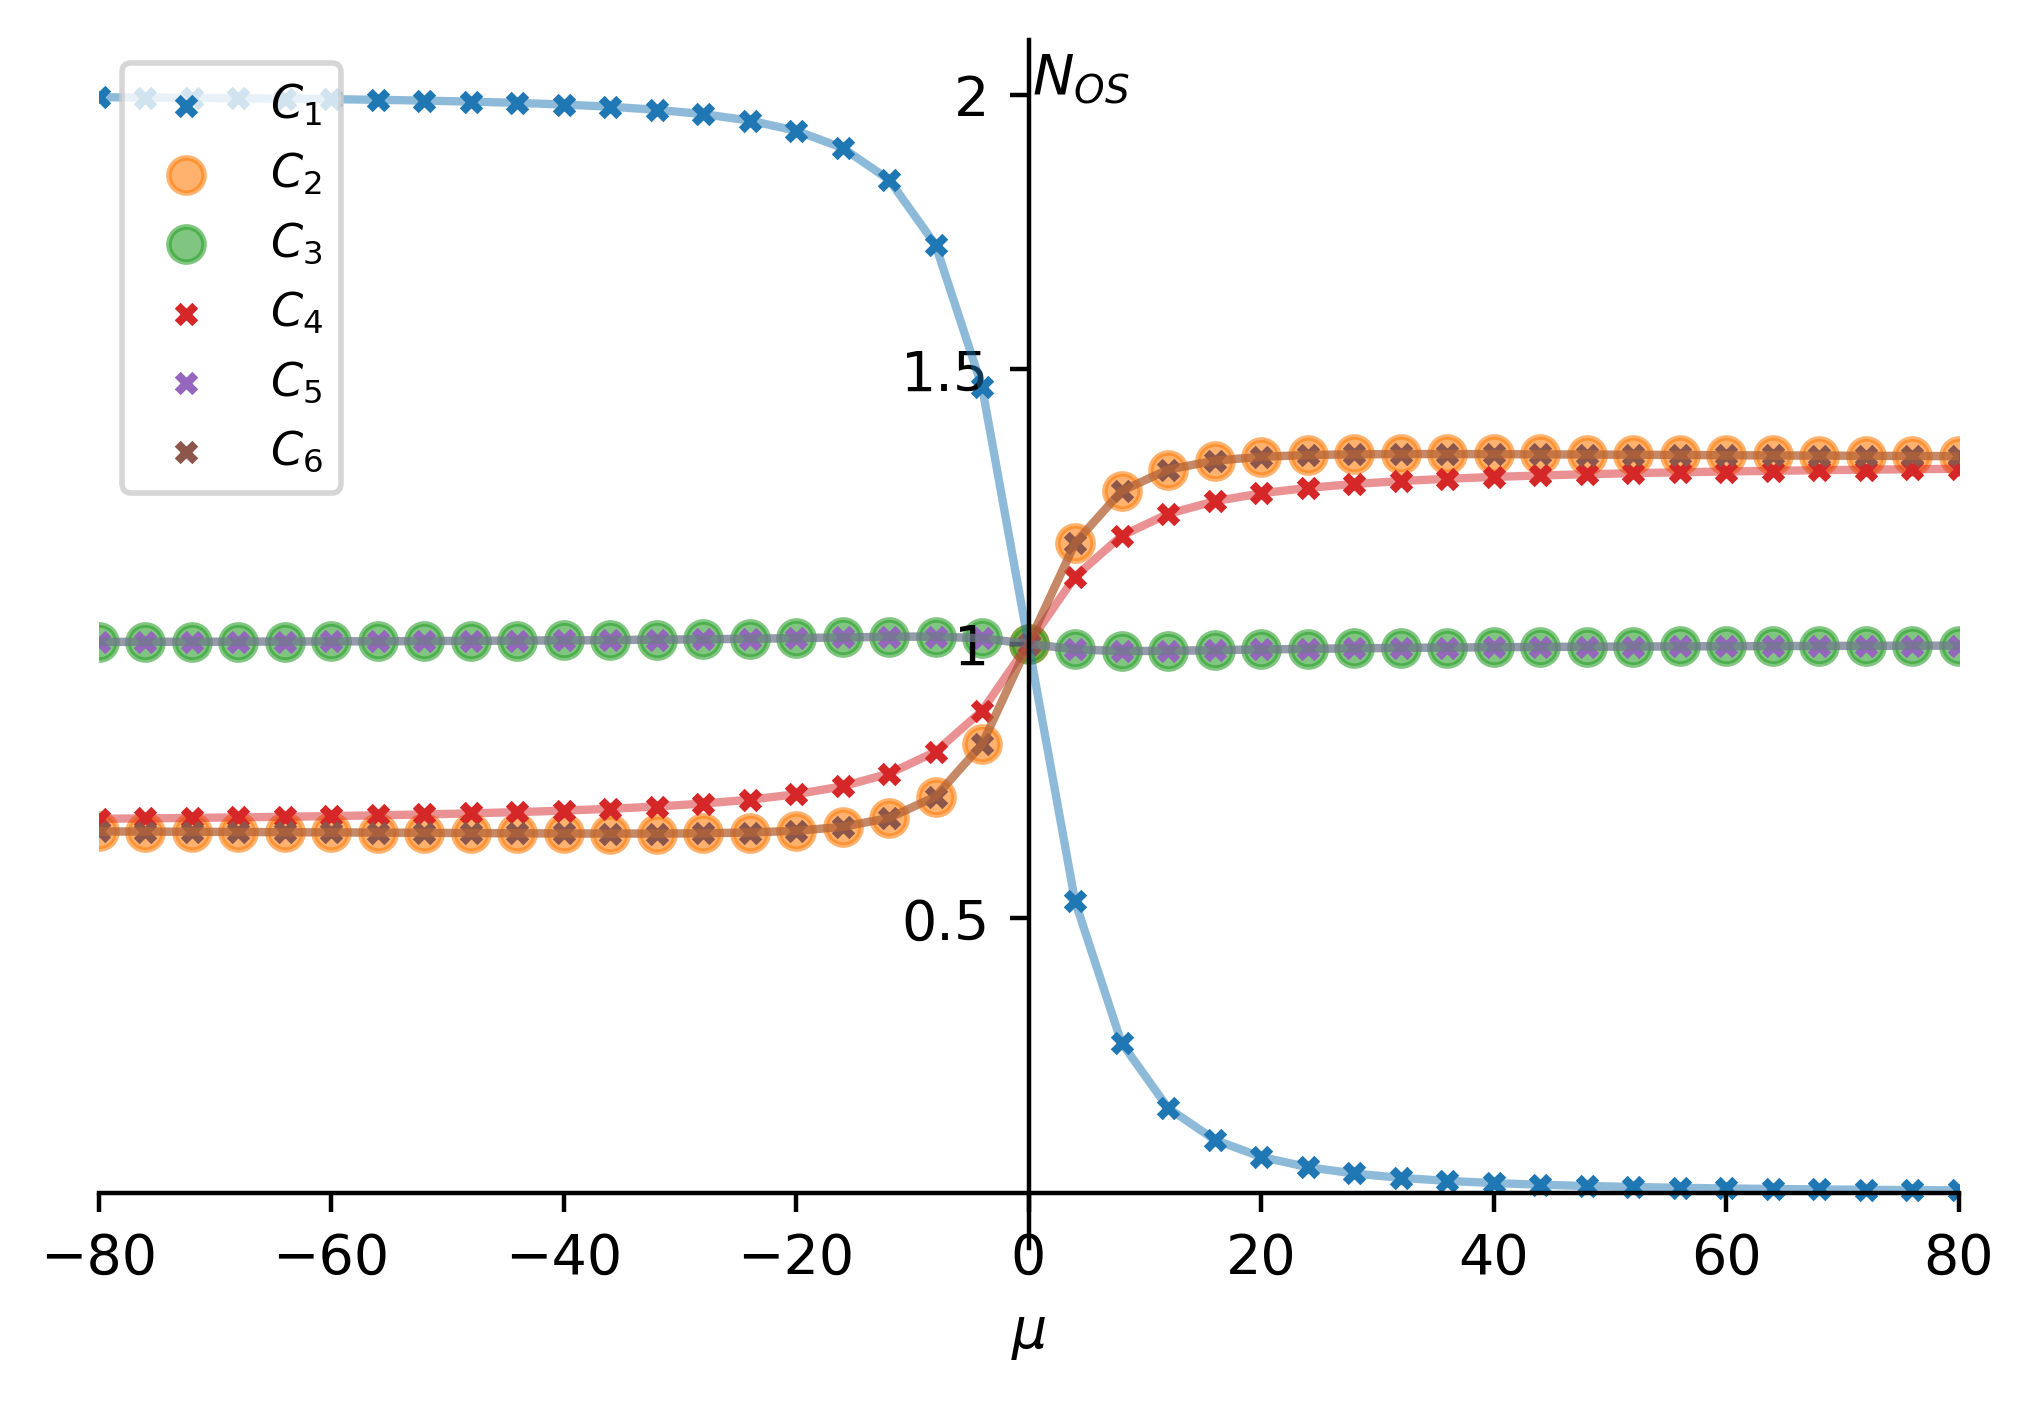

In [77]:
import matplotlib.pyplot as plt
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi= 400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-80, 80)
ax.set_ylim(-0.1, 2.1)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([0.5, 1, 1.5, 2])
ax.set_yticklabels(['0.5', '1', '1.5', '2'])


# Plot de gegevens
x= [5,0,1,2,3,4]
for index, atom in enumerate(x):
    plt.plot(potentials, electron_population[atom], alpha = 0.5)
    if atom in [0, 1]:
        plt.scatter(potentials,electron_population[atom], s = 40, alpha=0.6, label=f'$C_{index+1}$')
    else:
        plt.scatter(potentials,electron_population[atom], s = 10, marker = 'x', label=f'$C_{index+1}$')
    
    
    

# Benoem de assen en titel 
ax.set_xlabel('$\mu$')
ax.text(0.3, 2, '$N_{OS}$', rotation=0)

# Legenda
plt.legend(fontsize='small')

# Toon de plot
plt.show()


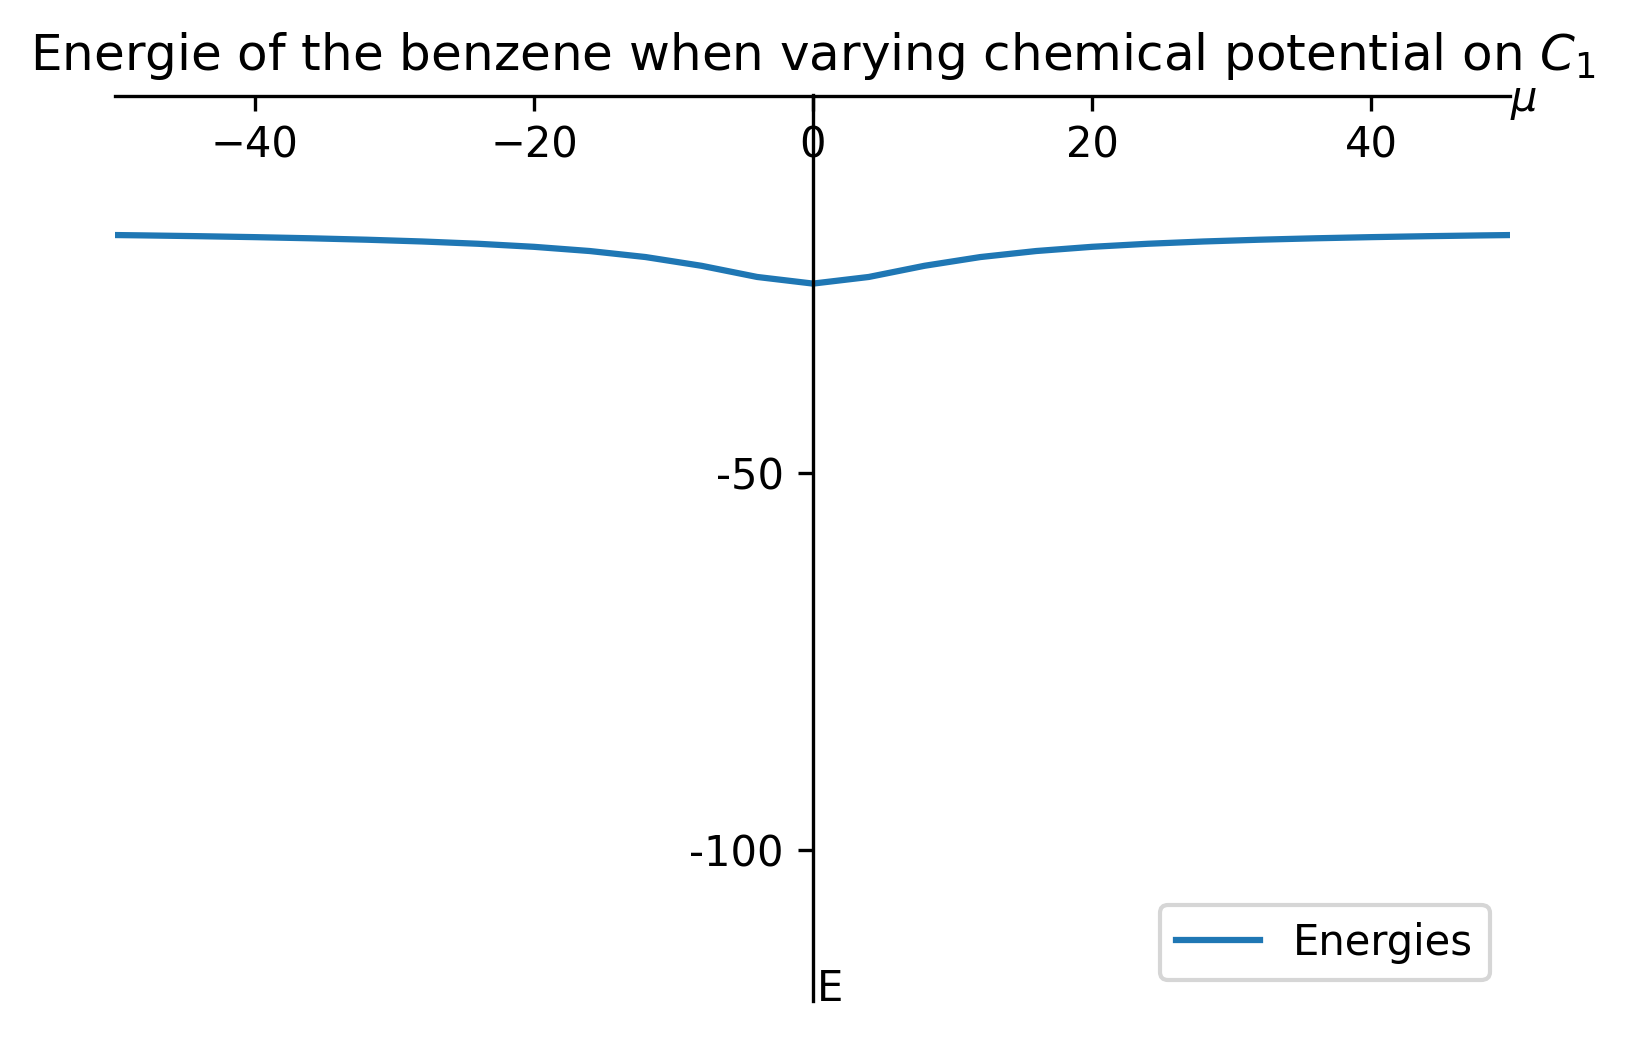

In [78]:
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi=300)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-50, 50)
ax.set_ylim(-120, 0.1)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([ -100, -50])
ax.set_yticklabels([ '-100', '-50'])


# Plot de gegevens
plt.plot(potentials, energies, label=f'Energies')


# Benoem de assen en titel 
plt.title('Energie of the benzene when varying chemical potential on $C_1$')
ax.text(50, -2, '$\mu$', rotation=0)
ax.text(0.3, -120, 'E', rotation=0)

# Legenda
plt.legend(loc= 'lower right')

# Toon de plot
plt.show()


[ 1.2116068  1.2116068 -0.        -1.2116068 -1.2116068  0.       ]
[ 0.6995215 -0.6995215 -1.399043  -0.6995215  0.6995215  1.399043 ]


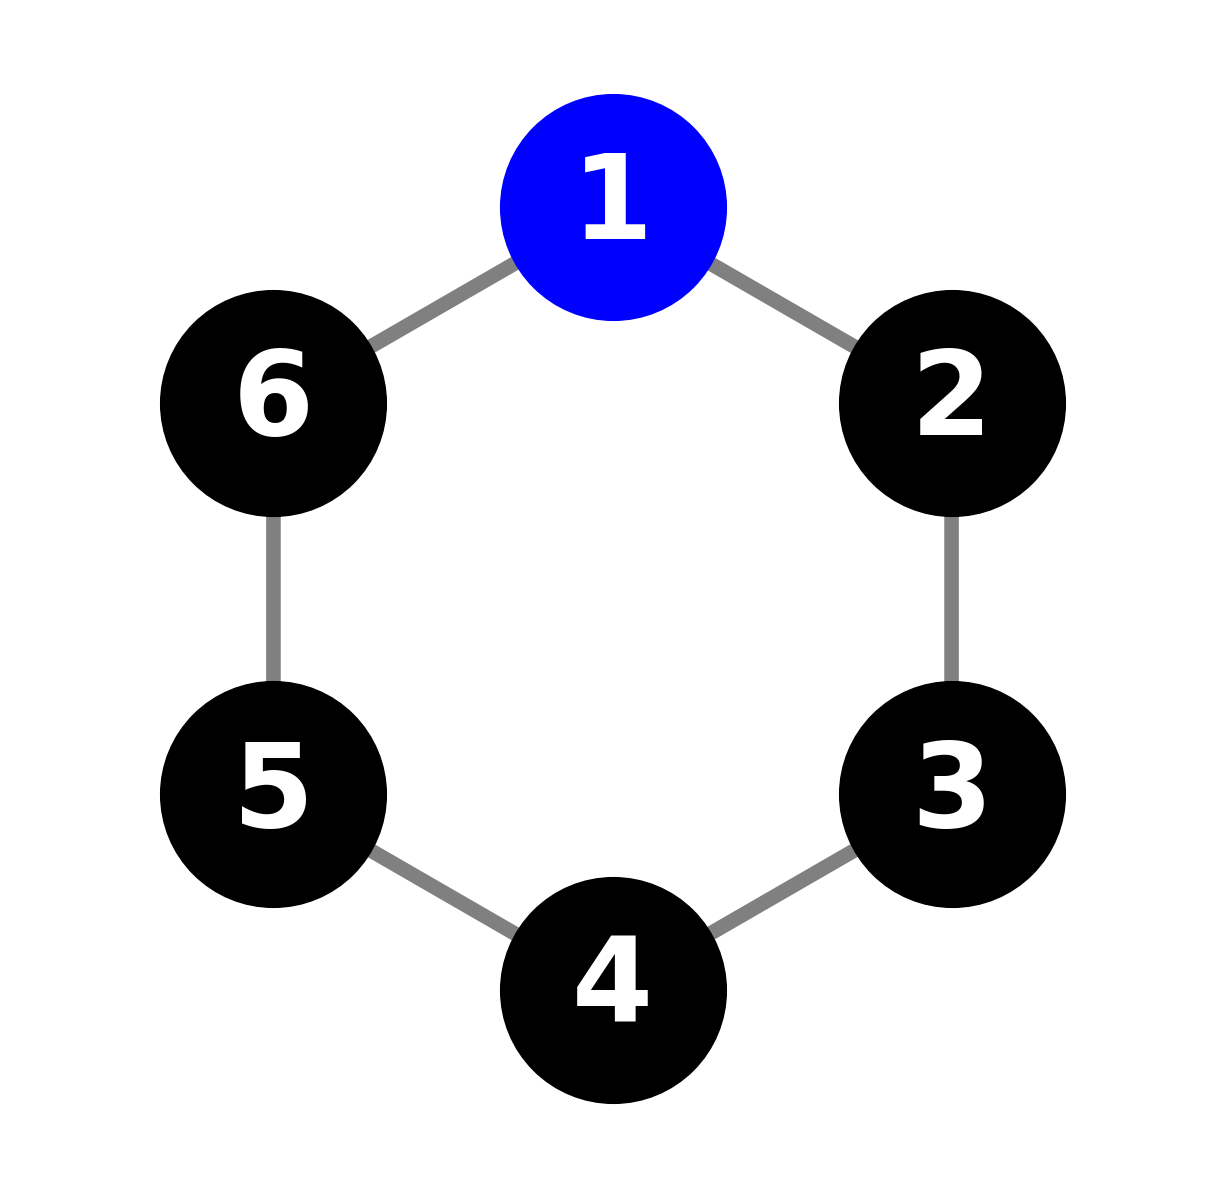

In [91]:

# Maak de plot voor de benzeenring
plt.figure(figsize=(2,2), dpi=700)
_x = coordinates[:, 0]
_y = coordinates[:, 1]
print(_x)
print(_y)
plt.plot(_x, _y, linestyle='-', color='grey')
for bound in extra_bounds:
    plt.plot([_x[bound[0]], _x[bound[1]]], [_y[bound[0]], _y[bound[1]]], linestyle='-', color='gray')

# Plot de atoomcoëfficiënten als gekleurde bollen
for index, atom in enumerate([5,0,1,2,3,4]):  # Alleen de eerste eigenvector gebruiken
    x = _x[atom]
    y = _y[atom]
    size = 500 # Schaal de grootte van de bol op basis van de coëfficiënt
    if index ==0:
        plt.scatter(x, y, s=size, marker='o', color='blue', zorder=2)
    else:
        plt.scatter(x, y, s=size, marker='o', color='black', zorder=2)
    fonts = 8
    plt.text(x, y, f'{index +1}', ha='center', va='center', fontsize=12, color='white', fontweight='bold')


plt.gca().margins(0.3)
plt.gca().axis('off')
plt.axis('equal') 


# Toon de plot
plt.show()

In [80]:
benzenedis = huckel(6, -0.15, -3)
benzenedis.create_matrix()

H_dis = benzenedis.huckel_matrix
cor = [(0,5),(5,4)]
for r,k in cor:
    H_dis[r][k]= 0
    H_dis[k][r]= 0

print(one_electron_operator)
print(H_dis)


[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[-0.15 -3.    0.    0.    0.    0.  ]
 [-3.   -0.15 -3.    0.    0.    0.  ]
 [ 0.   -3.   -0.15 -3.    0.    0.  ]
 [ 0.    0.   -3.   -0.15 -3.    0.  ]
 [ 0.    0.    0.   -3.   -0.15  0.  ]
 [ 0.    0.    0.    0.    0.   -0.15]]


In [81]:
electron_population_dis = [[],[],[],[],[],[]]
energies_dis = []
potentials = np.linspace(-20, 20, 51)
print(potentials)
for potential in potentials:
    benzenedis.huckel_matrix = H_dis + potential*one_electron_operator
    benzenedis.solve_huckel_matrix()
    eigenvalues = benzenedis.eigenvalues
    eigenvectors = benzenedis.eigenvectors
    D_huckel = pts.making_D(eigenvectors, 6)
    print(D_huckel)
    for index, density in enumerate(np.diag(D_huckel)):
        electron_population_dis[index].append(density)

    
    elec_to_place = 6
    i = 0
    energy = 0
    while elec_to_place >0:
        if elec_to_place > 1:
            elec_in_orbital = 2
        elif elec_to_place == 1:
            elec_in_orbital = 1
        else:
            elec_in_orbital = 0

        energy += elec_in_orbital*eigenvalues[i]
        elec_to_place -= elec_in_orbital
        i+=1
    energies_dis.append(energy)
print(energies_dis)
    

[-20.  -19.2 -18.4 -17.6 -16.8 -16.  -15.2 -14.4 -13.6 -12.8 -12.  -11.2
 -10.4  -9.6  -8.8  -8.   -7.2  -6.4  -5.6  -4.8  -4.   -3.2  -2.4  -1.6
  -0.8   0.    0.8   1.6   2.4   3.2   4.    4.8   5.6   6.4   7.2   8.
   8.8   9.6  10.4  11.2  12.   12.8  13.6  14.4  15.2  16.   16.8  17.6
  18.4  19.2  20. ]
[[ 0.66666682  0.78867518  0.33333326 -0.21132505 -0.33333364  0.        ]
 [ 0.78867518  1.          0.57735027  0.         -0.21132505  0.        ]
 [ 0.33333326  0.57735027  0.66666667  0.57735027  0.33333326  0.        ]
 [-0.21132505  0.          0.57735027  1.          0.78867518  0.        ]
 [-0.33333364 -0.21132505  0.33333326  0.78867518  0.66666682  0.        ]
 [ 0.          0.          0.          0.          0.          2.        ]]
[[ 0.66666682  0.78867518  0.33333326 -0.21132505 -0.33333364  0.        ]
 [ 0.78867518  1.          0.57735027  0.         -0.21132505  0.        ]
 [ 0.33333326  0.57735027  0.66666667  0.57735027  0.33333326  0.        ]
 [-0.21132505

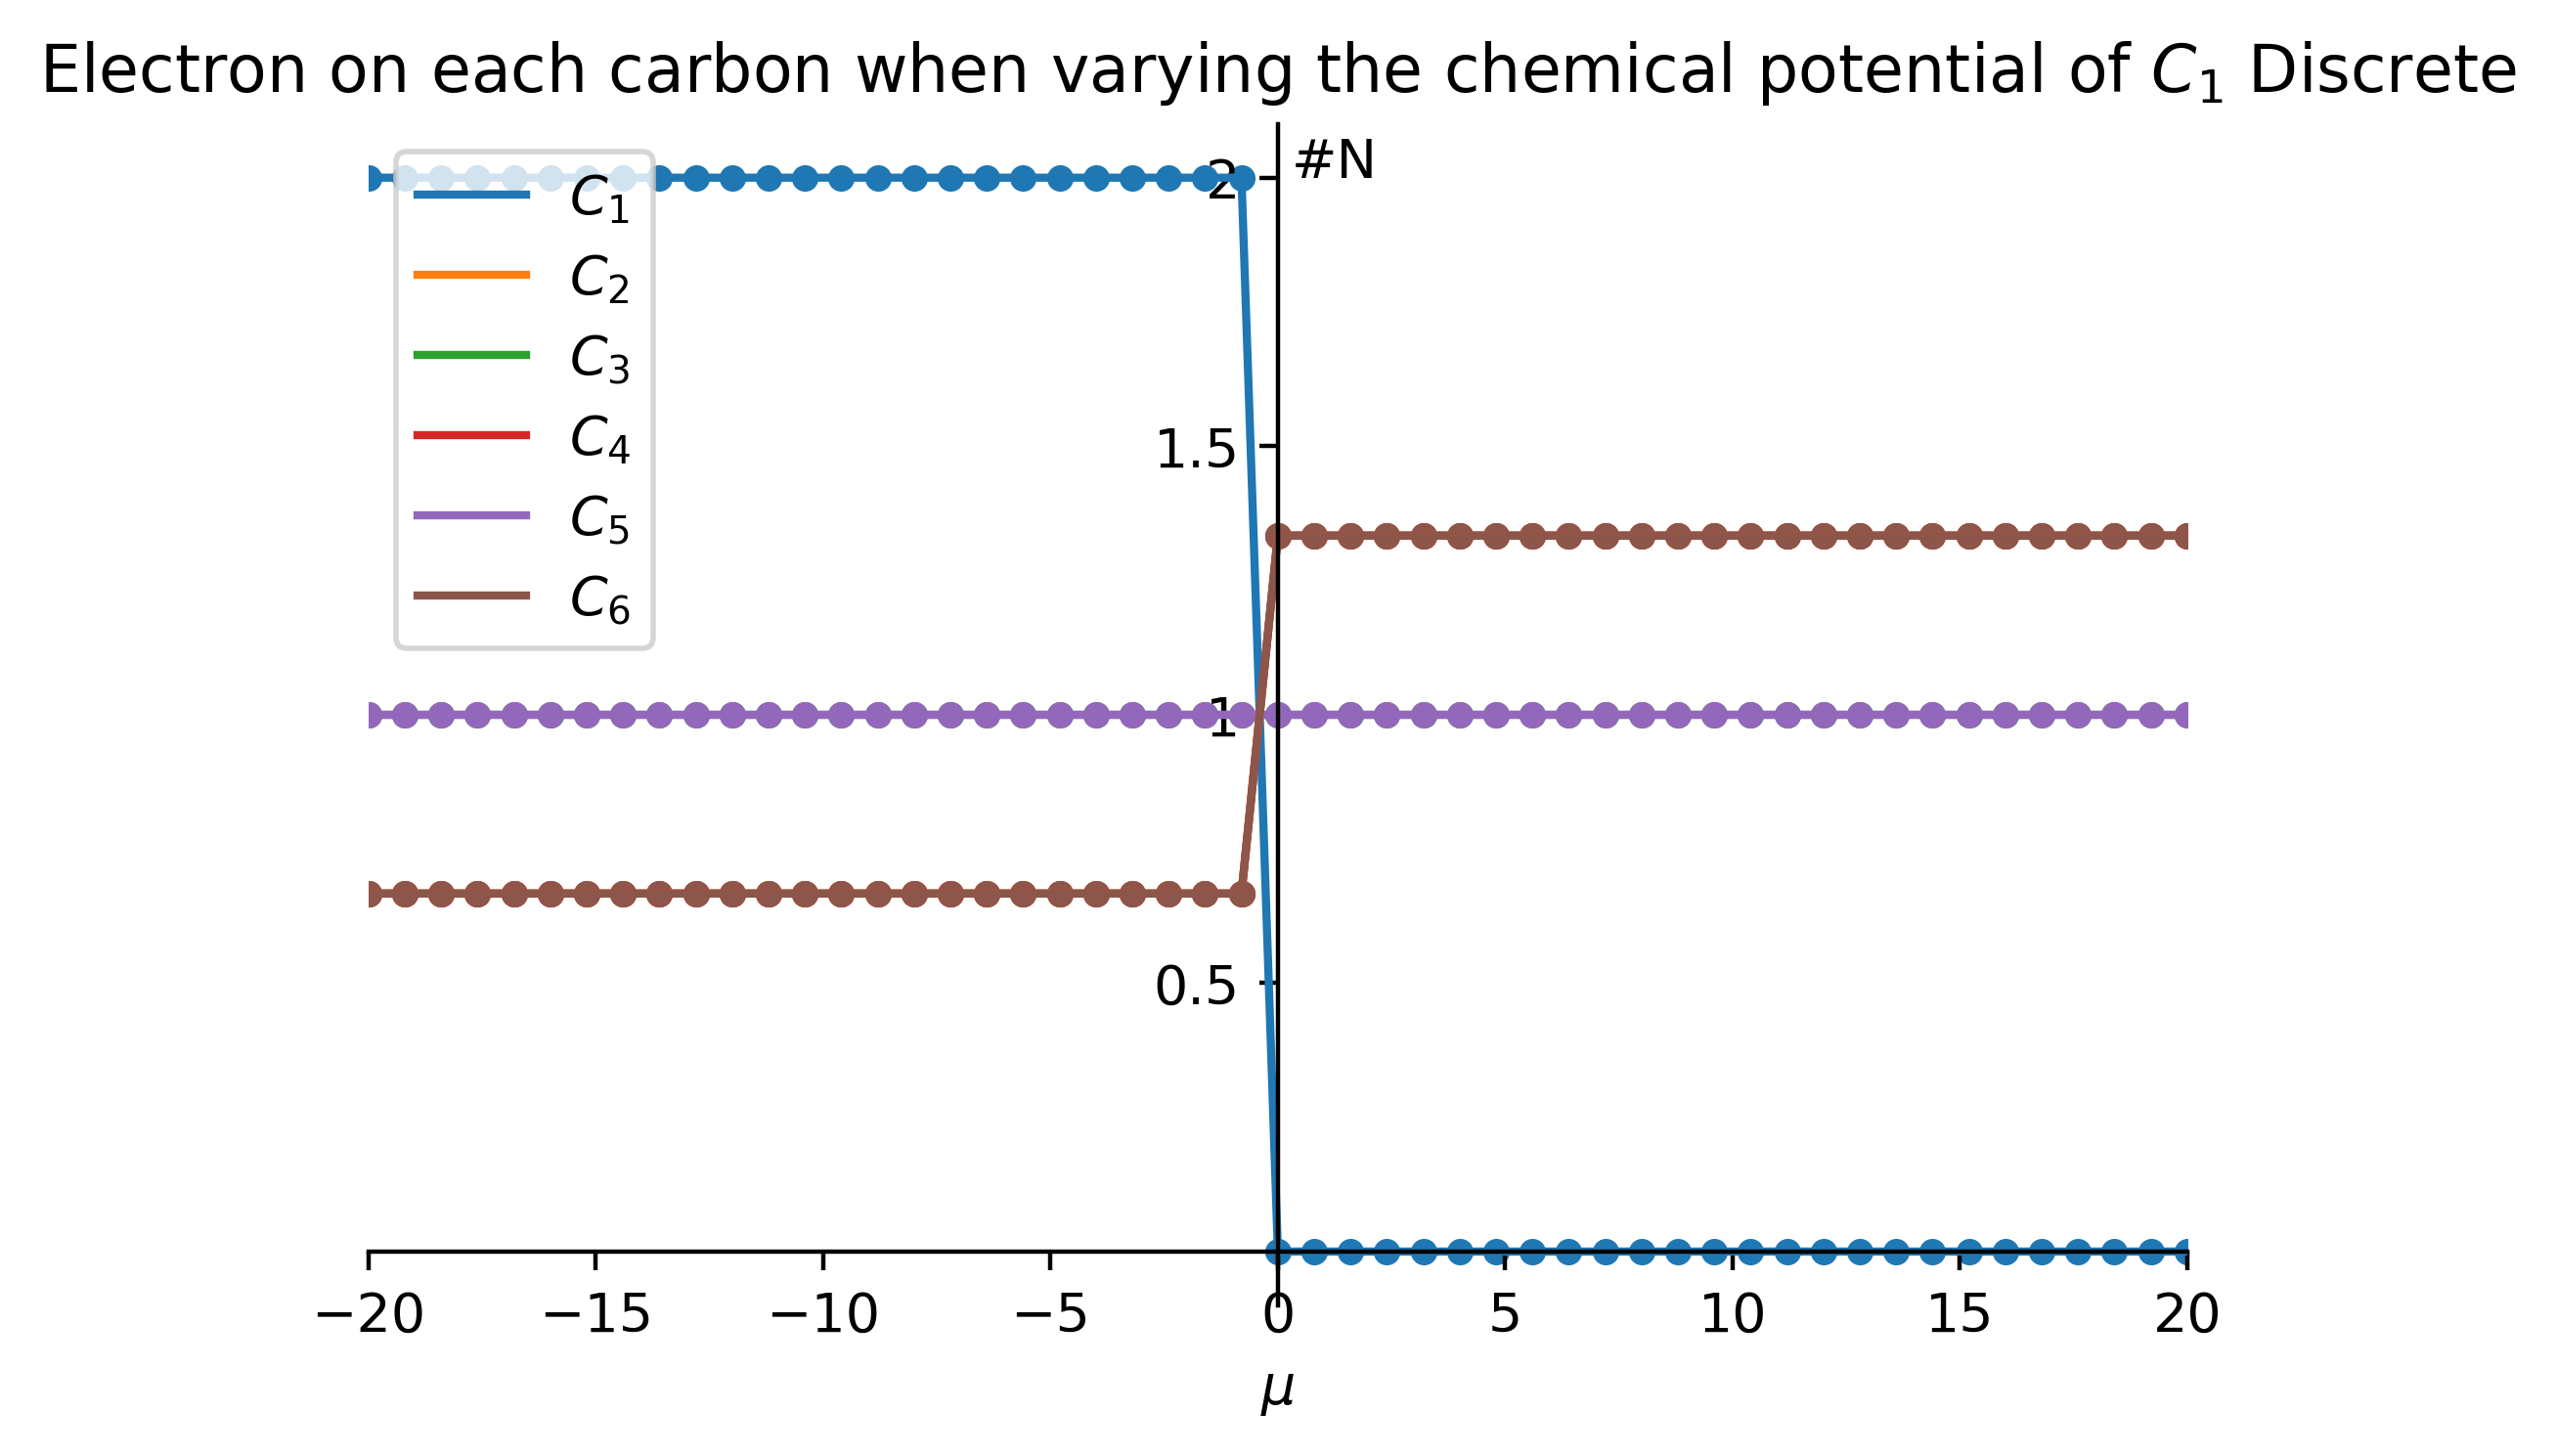

In [82]:
import matplotlib.pyplot as plt
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi= 400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-20, 20)
ax.set_ylim(-0.1, 2.1)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([0.5, 1, 1.5, 2])
ax.set_yticklabels(['0.5', "1", '1.5', '2'])


# Plot de gegevens
x= [5,0,1,2,3,4]
for index, atom in enumerate(x):
    plt.plot(potentials, electron_population_dis[atom], label=f'$C_{index+1}$')
    plt.scatter(potentials, electron_population_dis[atom],s=15)

# Benoem de assen en titel 
plt.title('Electron on each carbon when varying the chemical potential of $C_1$ Discrete')
ax.set_xlabel('$\mu$')
ax.text(0.3, 2, '#N', rotation=0)

# Legenda
plt.legend()

# Toon de plot
plt.show()


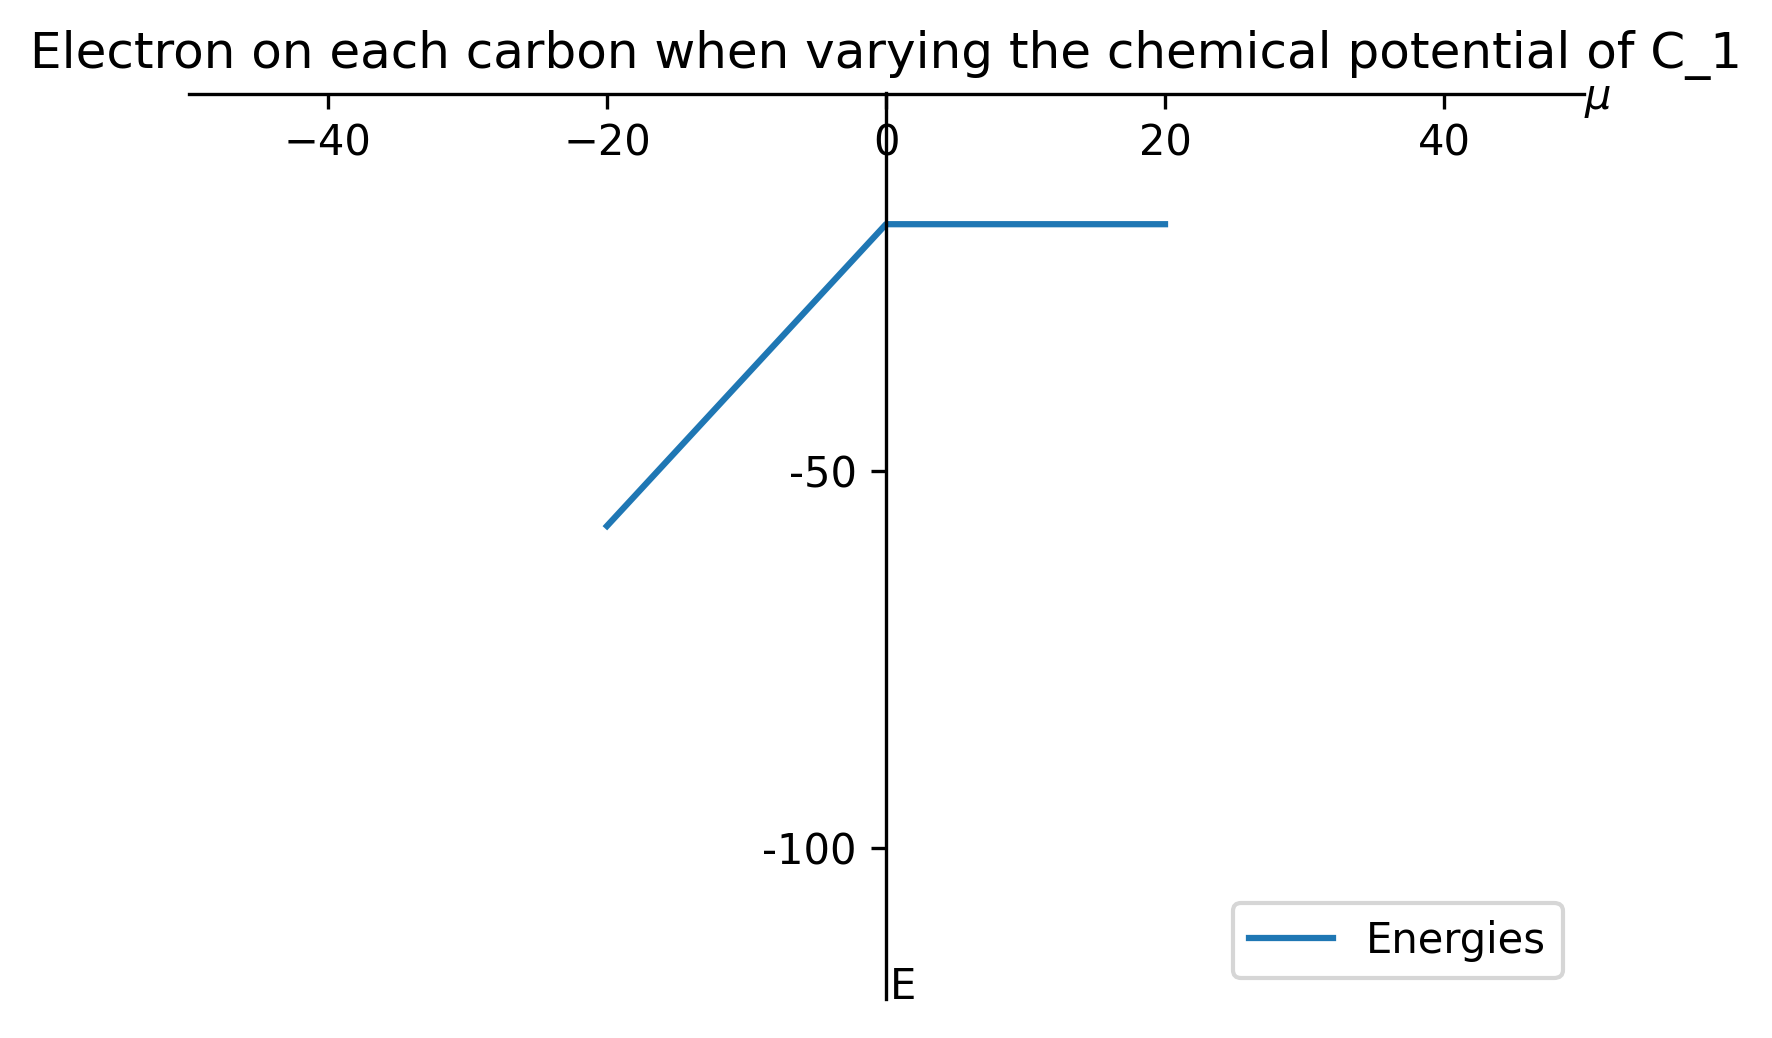

In [83]:
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi=300)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-50, 50)
ax.set_ylim(-120, 0.1)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([ -100, -50])
ax.set_yticklabels([ '-100', '-50'])


# Plot de gegevens
plt.plot(potentials, energies_dis, label=f'Energies')


# Benoem de assen en titel 
plt.title('Electron on each carbon when varying the chemical potential of C_1')
ax.text(50, -2, '$\mu$', rotation=0)
ax.text(0.3, -120, 'E', rotation=0)

# Legenda
plt.legend(loc= 'lower right')

# Toon de plot
plt.show()


In [84]:
two_electron_operator = np.zeros((6, 6))
two_electron_operator[5,5] = 1
two_electron_operator[0,0] = 1
print(two_electron_operator)

benzene2 = huckel(6, -0.15, -3)
benzene2.create_matrix()

H_2 = benzene2.huckel_matrix
print(H_2)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[-0.15 -3.    0.    0.    0.   -3.  ]
 [-3.   -0.15 -3.    0.    0.    0.  ]
 [ 0.   -3.   -0.15 -3.    0.    0.  ]
 [ 0.    0.   -3.   -0.15 -3.    0.  ]
 [ 0.    0.    0.   -3.   -0.15 -3.  ]
 [-3.    0.    0.    0.   -3.   -0.15]]


In [85]:
electron_population_2 = [[],[],[],[],[],[]]
energies_2 = []
for potential in potentials:
    benzene2.huckel_matrix = H_2 + potential*two_electron_operator
    benzene2.solve_huckel_matrix()
    eigenvalues = benzene2.eigenvalues
    eigenvectors = benzene2.eigenvectors
    D_huckel = pts.making_D(eigenvectors, 6)
    for index, density in enumerate(np.diag(D_huckel)):
        electron_population_2[index].append(density)

    
    elec_to_place = 6
    i = 0
    energy = 0
    while elec_to_place >0:
        if elec_to_place > 1:
            elec_in_orbital = 2
        elif elec_to_place == 1:
            elec_in_orbital = 1
        else:
            elec_in_orbital = 0

        energy += elec_in_orbital*eigenvalues[i]
        elec_to_place -= elec_in_orbital
        i+=1
    energies_2.append(energy)
print(energies_2)

[-92.1876, -89.056124, -85.930952, -82.812994, -79.70334600000001, -76.603336, -73.51458, -70.439064, -67.379252, -64.33821999999999, -61.319836, -58.329004000000005, -55.371956000000004, -52.456599999999995, -49.592906, -46.793186, -44.072116, -41.446093999999995, -38.931613999999996, -36.542608, -34.287510000000005, -32.167562, -30.177544, -28.308567999999998, -26.551558, -24.900000000000002, -23.35156, -21.908568, -20.577542, -19.367562, -18.28751, -17.342608, -16.531613999999998, -15.846093999999999, -15.272116000000002, -14.793186, -14.392906000000002, -14.056602, -13.771954, -13.529004, -13.319836, -13.138219999999999, -12.979254, -12.839066, -12.714582, -12.603336, -12.503346, -12.412992, -12.330952, -12.256125999999998, -12.1876]


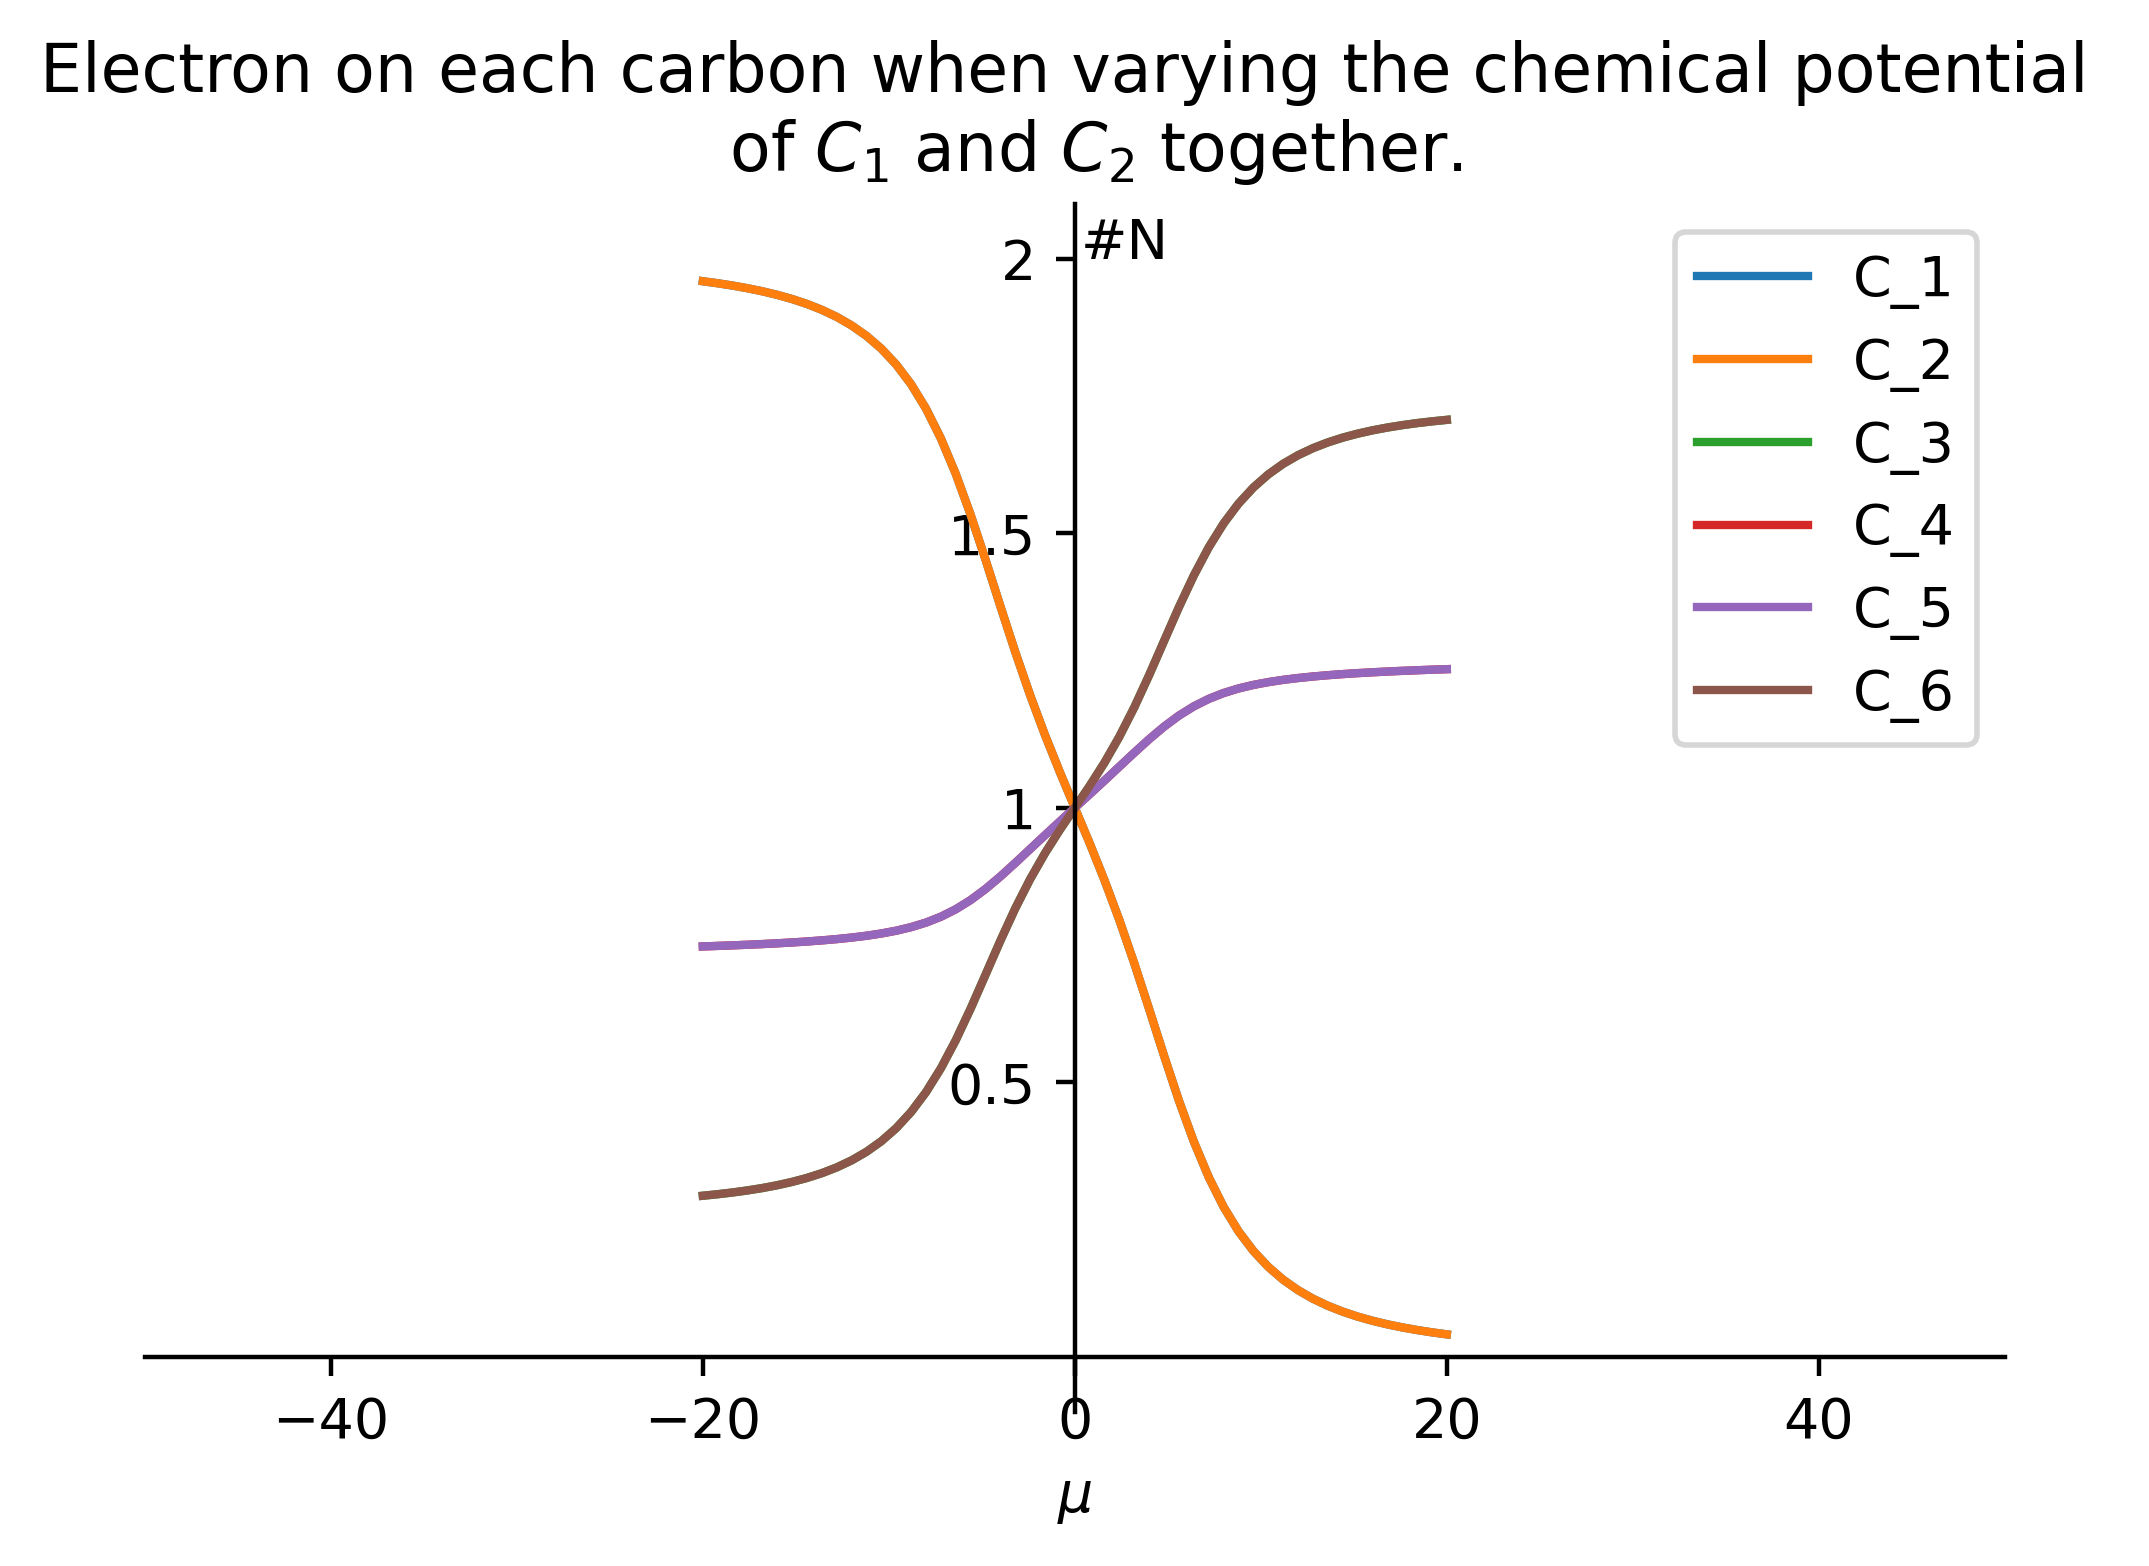

In [86]:
import matplotlib.pyplot as plt
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi= 400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-50, 50)
ax.set_ylim(-0.1, 2.1)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([0.5, 1, 1.5, 2])
ax.set_yticklabels(['0.5', "1", '1.5', '2'])


# Plot de gegevens
x= [5,0,1,2,3,4]
for index, atom in enumerate(x):
    plt.plot(potentials, electron_population_2[atom], label=f'C_{index+1}')


# Benoem de assen en titel 
plt.title('Electron on each carbon when varying the chemical potential \n  of $C_1$ and $C_2$ together.')
ax.set_xlabel('$\mu$')
ax.text(0.3, 2, '#N', rotation=0)

# Legenda
plt.legend()

# Toon de plot
plt.show()


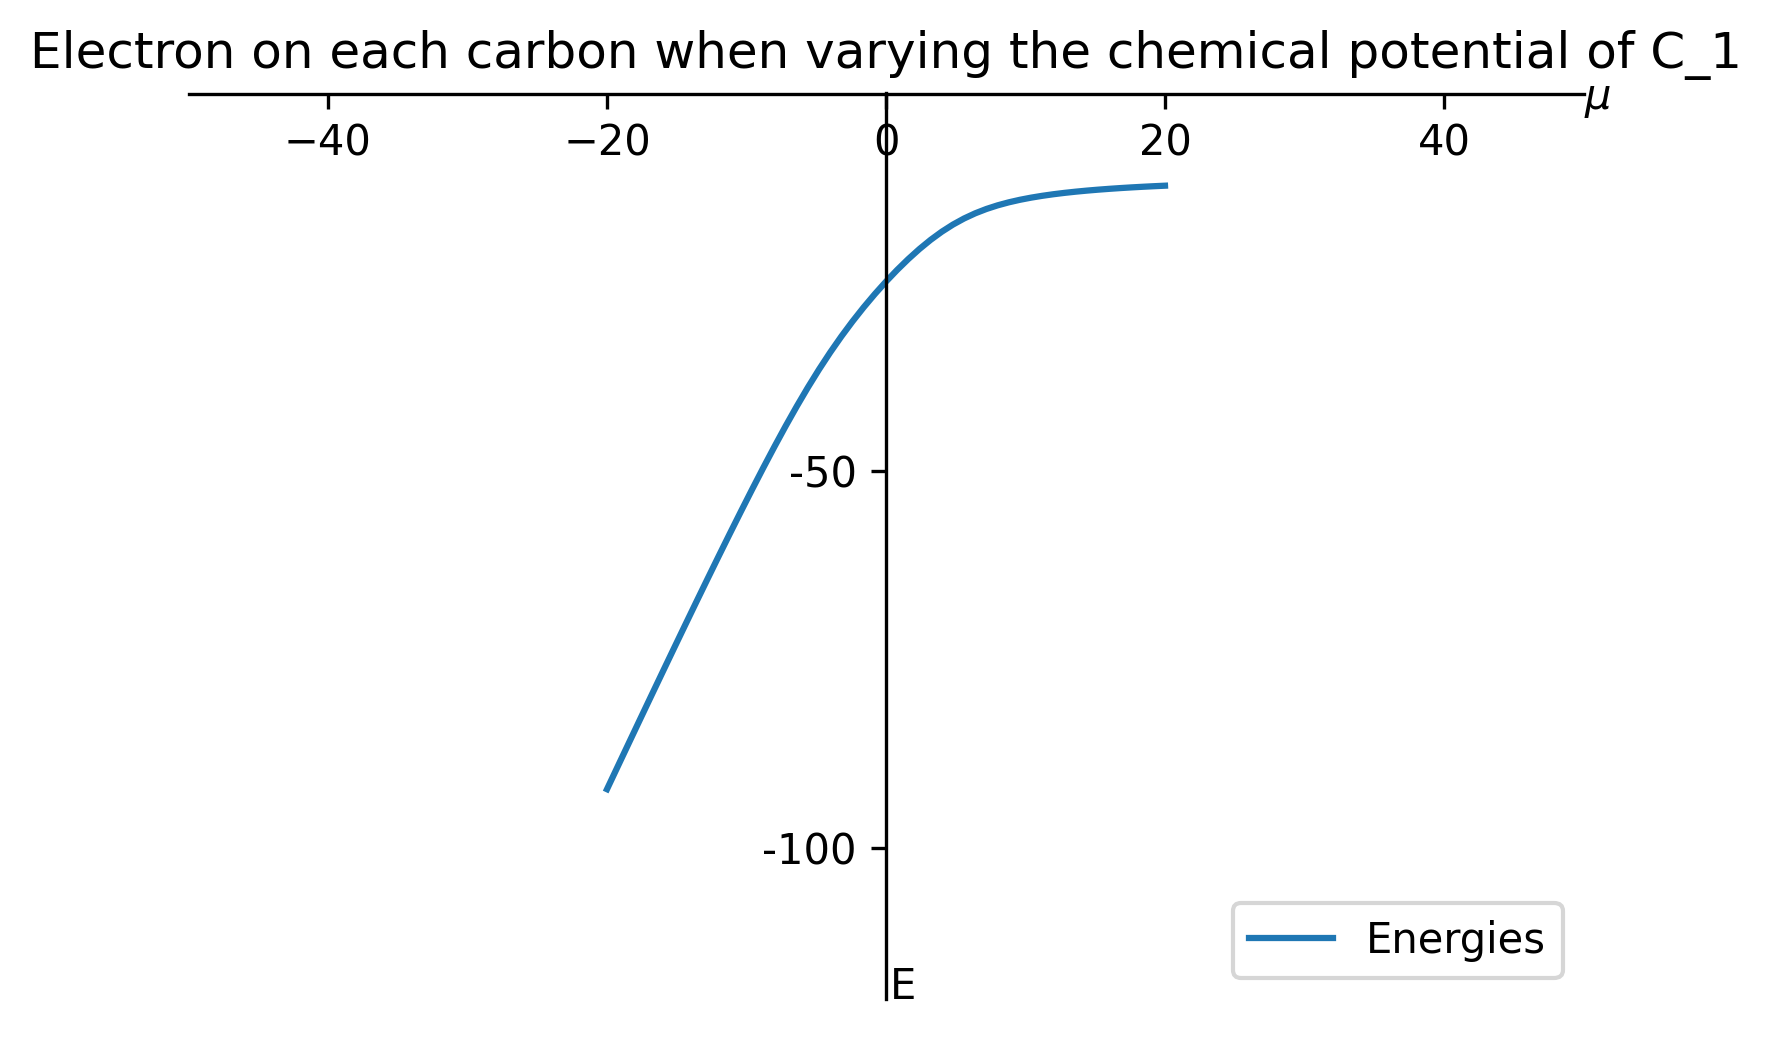

In [87]:
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi=300)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-50, 50)
ax.set_ylim(-120, 0.1)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([ -100, -50])
ax.set_yticklabels([ '-100', '-50'])


# Plot de gegevens
plt.plot(potentials, energies_2, label=f'Energies')


# Benoem de assen en titel 
plt.title('Electron on each carbon when varying the chemical potential of C_1')
ax.text(50, -2, '$\mu$', rotation=0)
ax.text(0.3, -120, 'E', rotation=0)

# Legenda
plt.legend(loc= 'lower right')

# Toon de plot
plt.show()


In [88]:
two_electron_operator = np.zeros((6, 6))
two_electron_operator[5,5] = 1
two_electron_operator[0,0] = 1
print(two_electron_operator)

benzene2 = huckel(6, -0.3, -15)
benzene2.create_matrix()

H_2 = benzene2.huckel_matrix
H_2[0][1] = 0
H_2[1][0] = 0
H_2[5][4] = 0
H_2[4][5] = 0

print(H_2)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[ -0.3   0.    0.    0.    0.  -15. ]
 [  0.   -0.3 -15.    0.    0.    0. ]
 [  0.  -15.   -0.3 -15.    0.    0. ]
 [  0.    0.  -15.   -0.3 -15.    0. ]
 [  0.    0.    0.  -15.   -0.3   0. ]
 [-15.    0.    0.    0.    0.   -0.3]]


In [89]:
electron_population_2 = [[],[],[],[],[],[]]
energies_2 = []
for potential in potentials:
    benzene2.huckel_matrix = H_2 + potential*two_electron_operator
    benzene2.solve_huckel_matrix()
    eigenvalues = benzene2.eigenvalues
    eigenvectors = benzene2.eigenvectors
    D_huckel = pts.making_D(eigenvectors, 6)
    for index, density in enumerate(np.diag(D_huckel)):
        electron_population_2[index].append(density)

    
    elec_to_place = 6
    i = 0
    energy = 0
    while elec_to_place >0:
        if elec_to_place > 1:
            elec_in_orbital = 2
        elif elec_to_place == 1:
            elec_in_orbital = 1
        else:
            elec_in_orbital = 0

        energy += elec_in_orbital*eigenvalues[i]
        elec_to_place -= elec_in_orbital
        i+=1
    energies_2.append(energy)
print(energies_2)

[-138.88204, -137.28204, -135.68204, -134.08204, -132.48204, -130.88204, -129.28204, -127.68204, -126.08203999999999, -124.48204, -122.88203999999999, -121.28204, -119.68204, -118.08203999999999, -116.48204, -114.88203999999999, -113.28204, -111.68204, -110.08203999999999, -108.48204, -106.88203999999999, -105.28204, -103.68204, -102.08203999999999, -100.48204, -98.88203999999999, -97.28204, -95.68204, -94.08203999999999, -92.48204, -90.88203999999999, -89.28204, -87.68204, -86.08203999999999, -84.48204, -82.88203999999999, -81.28204, -79.68204, -78.08203999999999, -76.48204, -74.88203999999999, -73.28204, -71.68204, -70.08203999999999, -68.48204, -66.88203999999999, -65.28204, -63.68203999999999, -62.08203999999999, -60.48204, -58.882039999999996]


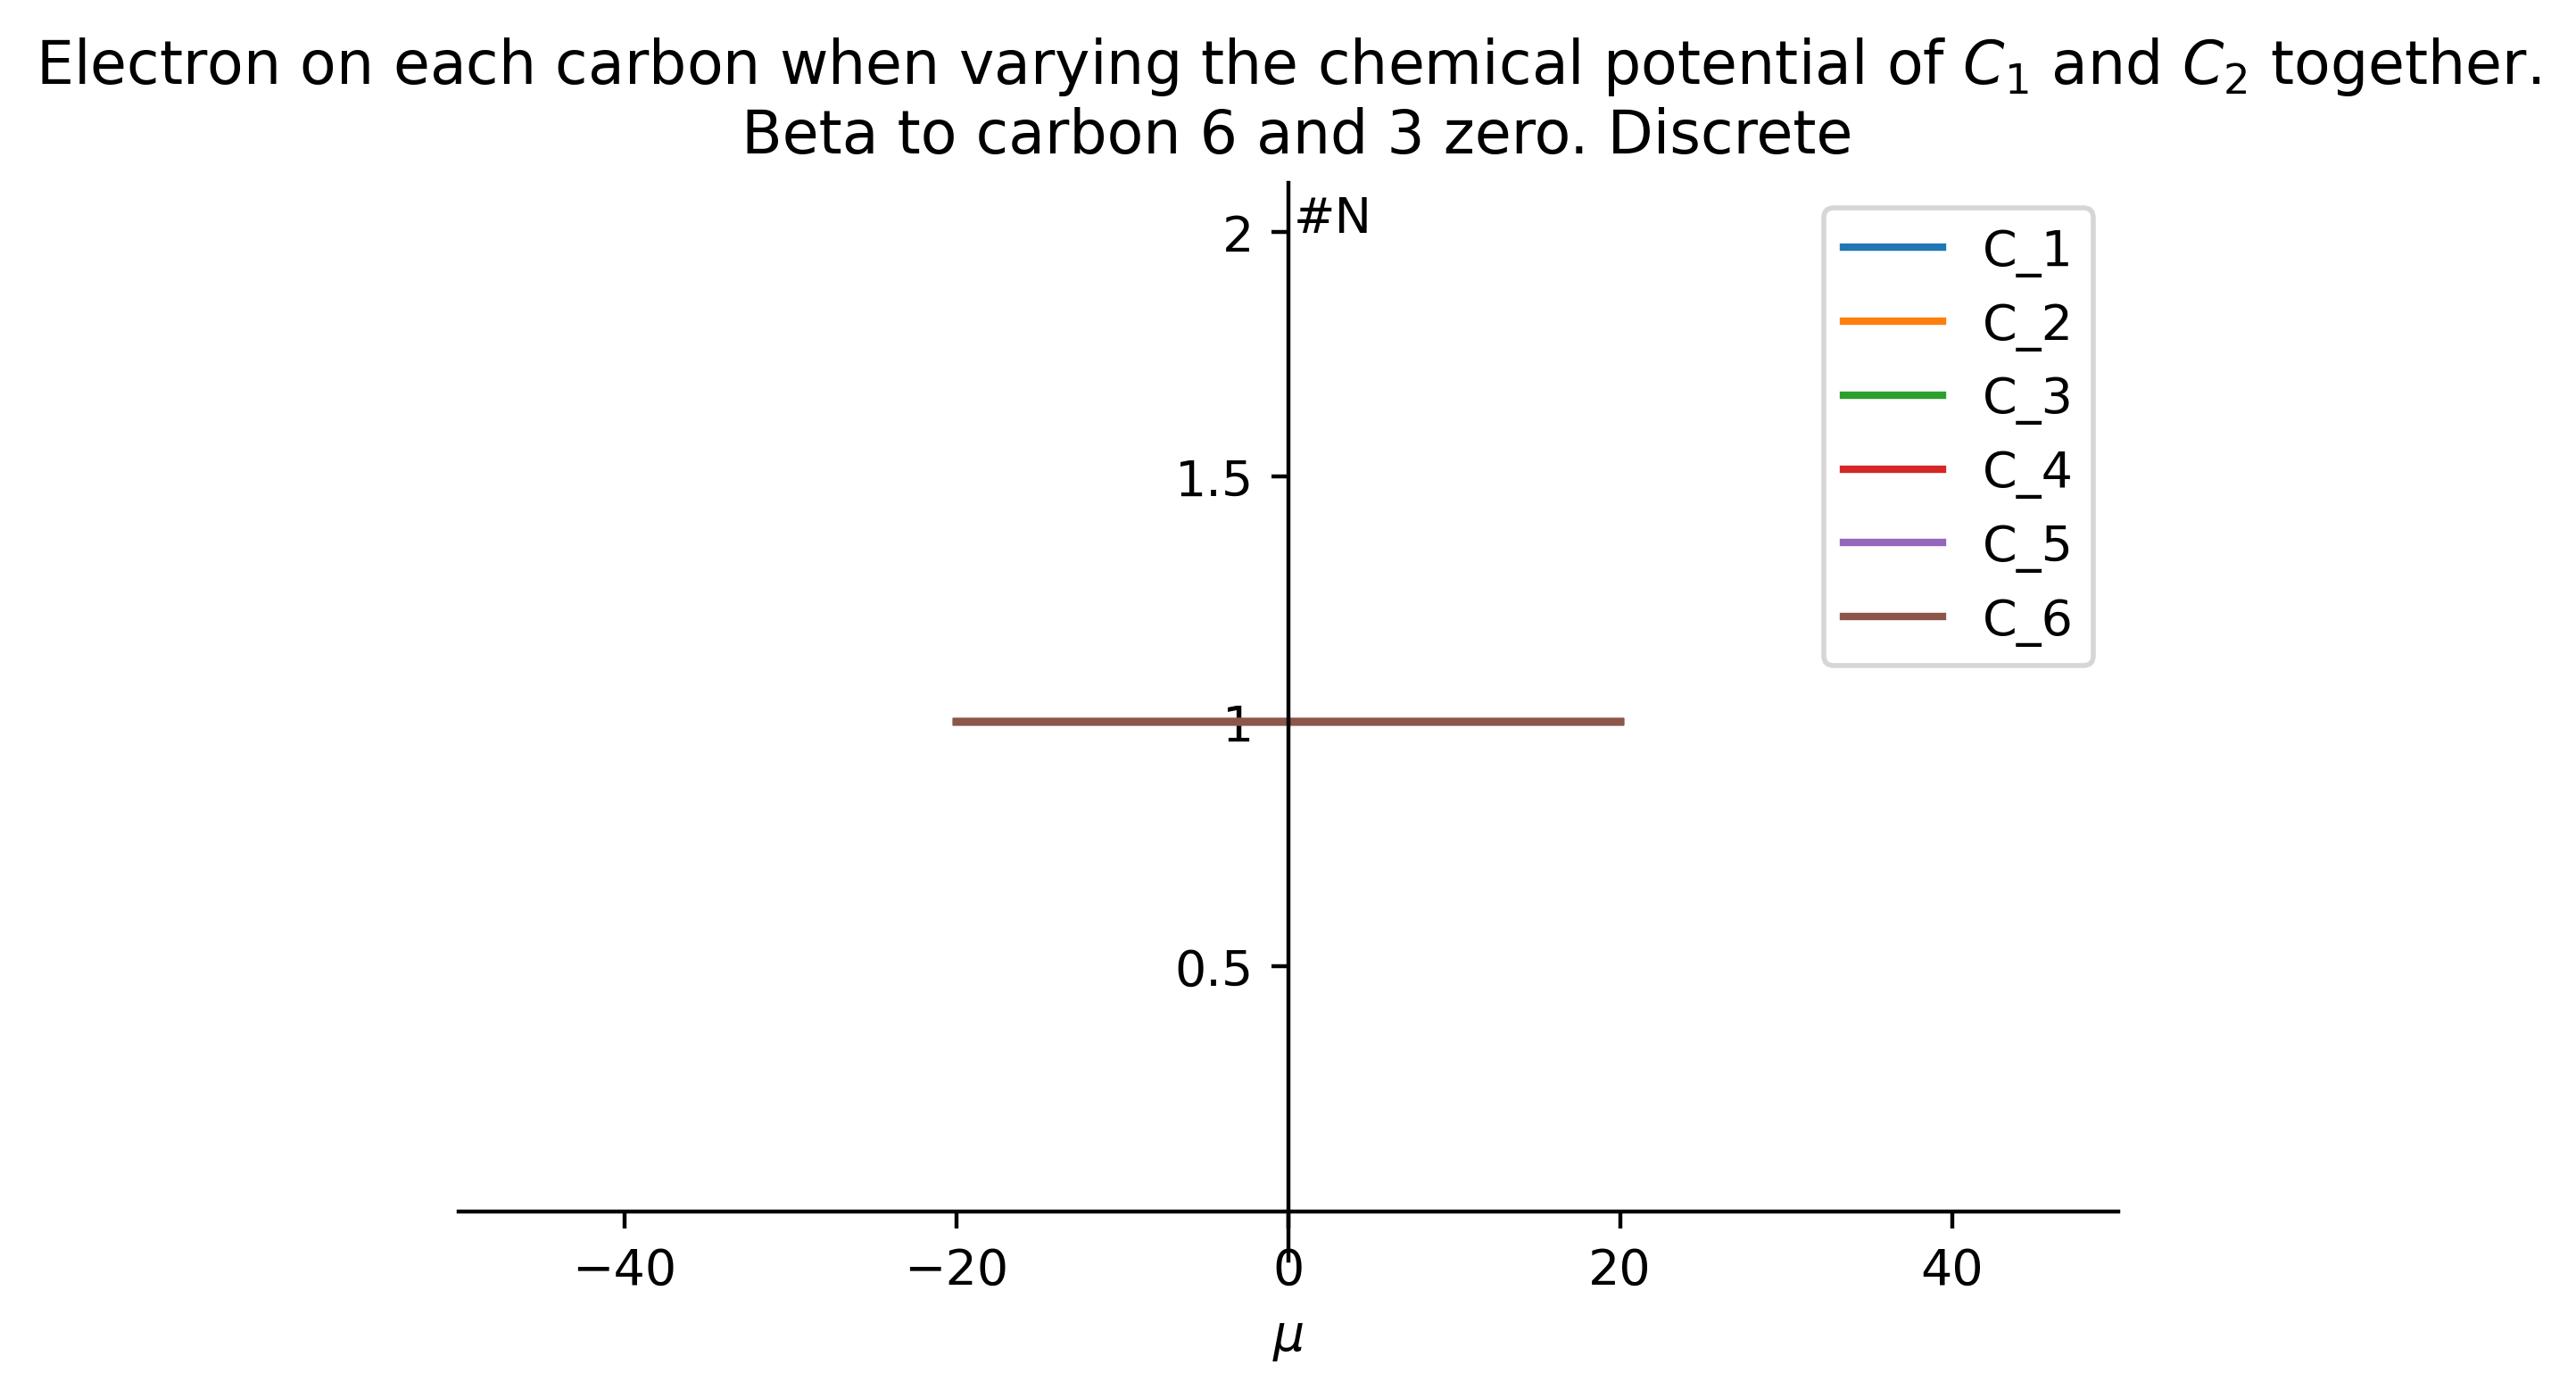

In [90]:
import matplotlib.pyplot as plt
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi= 400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-50, 50)
ax.set_ylim(-0.1, 2.1)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([0.5, 1, 1.5, 2])
ax.set_yticklabels(['0.5', "1", '1.5', '2'])


# Plot de gegevens
x= [5,0,1,2,3,4]
for index, atom in enumerate(x):
    plt.plot(potentials, electron_population_2[atom], label=f'C_{index+1}')


# Benoem de assen en titel 
plt.title('Electron on each carbon when varying the chemical potential of $C_1$ and $C_2$ together.\n Beta to carbon 6 and 3 zero. Discrete')
ax.set_xlabel('$\mu$')
ax.text(0.3, 2, '#N', rotation=0)

# Legenda
plt.legend()

# Toon de plot
plt.show()
